*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap03/'
OutputDir    = '3ILL-03Posed/'
FileBaseName = '3ILL-03Posed'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3ILL-03Posed/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3ILL-03Posed/


$M=1$, $N=2$の不良設定問題
$$
\left(y_{1}\right)
=
\left(
  \begin{array}{cc}
    X_{11} & X_{12}
  \end{array}
\right)
\left(
  \begin{array}{c}
    \omega_{1} \\
    \omega_{2}
  \end{array}
\right)
$$

$M=1$, $N=2$の不良設定問題の例
$$
\left(y_{1}\right)
=
\left(
  \begin{array}{cc}
    X_{11} & X_{12}
  \end{array}
\right)
\left(
  \begin{array}{c}
    \omega_{1} \\
    \omega_{2}
  \end{array}
\right)
$$

* $y_{1}=4$
* $\left(
    \begin{array}{cc}
      X_{11} & X_{12}
    \end{array}
  \right)=\left(
    \begin{array}{cc}
      2 & 3
    \end{array}
  \right)
$

$$
\omega_{2} = -\frac{2}{3}\omega_{1}+\frac{4}{3}
$$

In [4]:
############################################
#
omega1_range = 2.5
#
omega1 = np.linspace(-omega1_range, omega1_range, num=50 )
omega2 = -2 / 3 * omega1 + 4 / 3

グラフを描く関数

In [5]:
############################################
def Grf_omega12( p_th = None, lp_vals = None, points = None ):
  #
  plt.rcParams['font.size'] = 20
  #
  fig = plt.figure(figsize=(6, 6))
  #
  fig.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( r'$\omega_{1}$' )
  ax1.set_ylabel( r'$\omega_{2}$' )
  #
  ax1.set_xlim( -omega1_range, omega1_range )
  ax1.set_ylim( -omega1_range, omega1_range )
  #
  ax1.plot( omega1, omega2, label = r'$y_{1}=X_{11}\omega_{1}+X_{12}\omega_{2}$', color='red' )
  #
  x_left, x_right = ax1.set_xlim()
  y_bot, y_top    = ax1.set_ylim()
  #
  ax1.axvline( x=0.0, ymin=y_bot,  ymax=y_top,   linestyle='dashed', color='black' )
  ax1.axhline( y=0.0, xmin=x_left, xmax=x_right, linestyle='dashed', color='black' )
  #
  if lp_vals is not None:
    #
    for lp_val_ in lp_vals:
      #
      (lp_val, lp_str) = lp_val_
      #
      x1_ = []
      x2_ = []
      #
      angs = np.linspace(0,360,num=361) / 180.0 * np.pi
      #
      for ang in angs:
        x1 = np.cos( ang )
        x2 = np.sin( ang )
        if x1 == 0.0:
          if x2 > 0:
            x2 = +lp_val
          else:
            x2 = -lp_val
        else:
          lp = (np.abs( x1 )**p_th + np.abs( x2 )**p_th)**(1.0 / p_th)
          x1 = x1 / lp * lp_val
          x2 = x2 / lp * lp_val
        #
        x1_.append(x1)
        x2_.append(x2)
      #
      ax1.plot( x1_, x2_, label = lp_str, linewidth=0.75 )
  #
  if points is not None:
    #
    for point in points:
      #
      (point_omega1, point_omega2, point_label ) = point
      #
      ax1.scatter( point_omega1, point_omega2, label=point_label, s=40 )
  #
  plt.legend(fontsize=12)
  #
  plt.gca().set_aspect('equal')
  #
  plt.show()
  #
  return fig

$\omega_{2} = -\frac{2}{3}\omega_{1}+\frac{4}{3}$ のグラフ

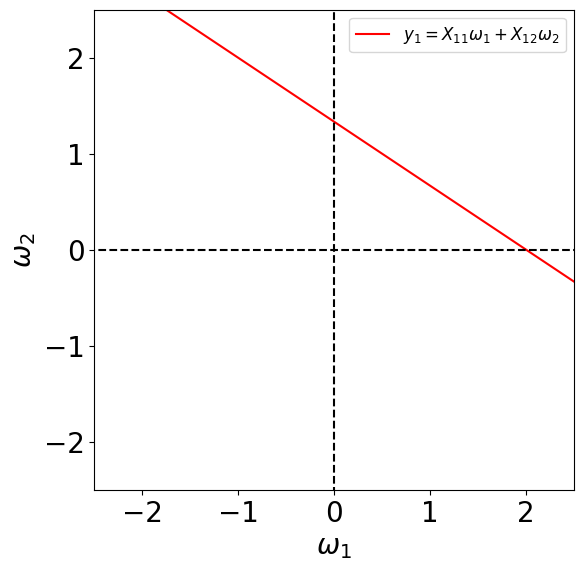

In [6]:
############################################
fig = Grf_omega12()
#
fig.savefig( FilePath + FileBaseName + '.pdf' )

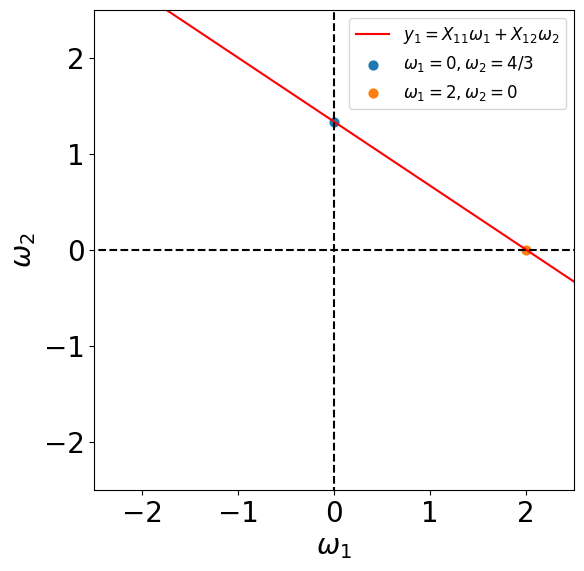

In [7]:
############################################
Pint_s = [ (0, 4/3, r'$\omega_{1}=0,\omega_{2}=4/3$'),
           (2, 0,   r'$\omega_{1}=2,\omega_{2}=0$'  ) ]
#
fig = Grf_omega12( points=Pint_s )
#
fig.savefig( FilePath + FileBaseName + '-L0.pdf' )

$\omega_{2} = -\frac{2}{3}\omega_{1}+\frac{4}{3}$

* $\omega_{1}=0$ の場合、$\omega_{2}=\frac{4}{3}$
* $\omega_{2}=0$ の場合、$\omega_{1}=2$

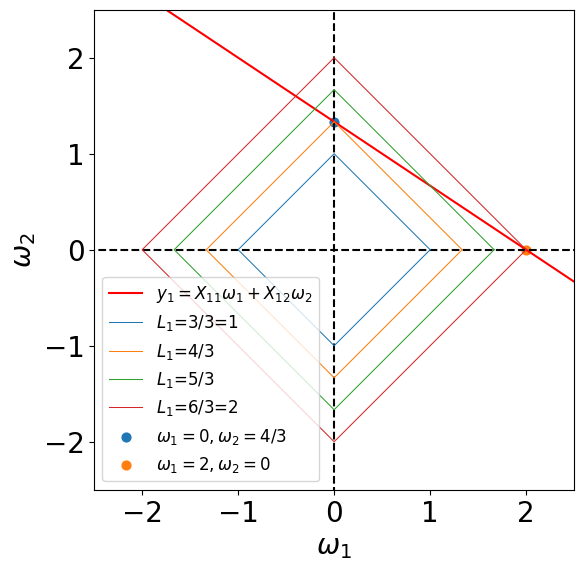

In [8]:
############################################
Lp_s = [(1.0, r'$L_{1}$=3/3=1'), (4/3, r'$L_{1}$=4/3'), (5/3, r'$L_{1}$=5/3'), (2.0, r'$L_{1}$=6/3=2')]
Pint_s = [ (0, 4/3, r'$\omega_{1}=0,\omega_{2}=4/3$'),
           (2, 0,   r'$\omega_{1}=2,\omega_{2}=0$'  ) ]
#
fig = Grf_omega12( p_th = 1.0, lp_vals = Lp_s, points=Pint_s )
#
fig.savefig( FilePath + FileBaseName + '-L1.pdf' )

$\omega_{2} = -\frac{2}{3}\omega_{1}+\frac{4}{3}$

* $\omega_{1}^2+\omega_{2}^2=r^{2}$ の円に、上記の直線が接する場合

$$
\omega_{1}^2
+
\left(
  -\frac{2}{3}\omega_{1}+\frac{4}{3}
\right)^{2}
=r^{2}
$$

$$
\omega_{1}^2
+
\frac{4}{9}
\omega_{1}^2
-
\frac{16}{9}
\omega_{1}
+
\frac{16}{9}
=r^{2}
$$

これを整理すると

$$
13
\omega_{1}^2
-
16
\omega_{1}
+
16
-
9r^{2}
=
0
$$

接するためには 解が1つ

$$
(-16)^{2}-4\times13\times(16-9r^2)=0
$$

$$
\therefore
r^2 = \frac{16}{13}
$$

得られる解は

$$
\omega_{1}
=
\frac{8}{13},
\,\,\,
\omega_{2}
=
\frac{12}{13},
$$

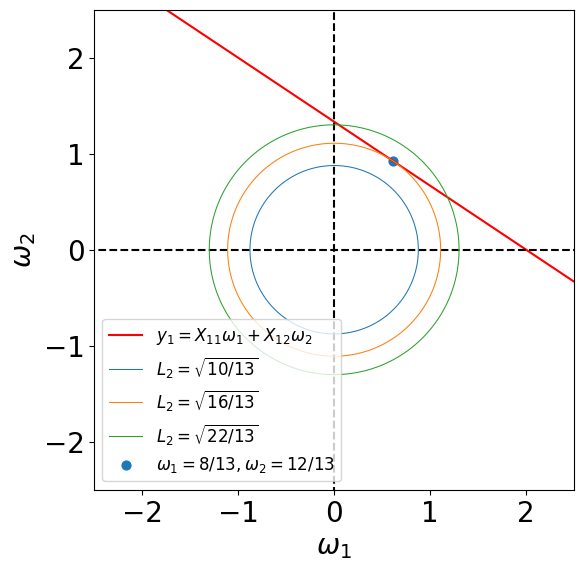

In [9]:
############################################
Lp_s = [( np.sqrt(10/13), r'$L_{2}=\sqrt{10/13}$' ),
        ( np.sqrt(16/13), r'$L_{2}=\sqrt{16/13}$' ),
        ( np.sqrt(22/13), r'$L_{2}=\sqrt{22/13}$' ) ]
Pint_s = [ (8/13, 12/13, r'$\omega_{1}=8/13,\omega_{2}=12/13$') ]
#
fig = Grf_omega12( p_th = 2.0, lp_vals = Lp_s, points=Pint_s )
#
fig.savefig( FilePath + FileBaseName + '-L2.pdf' )

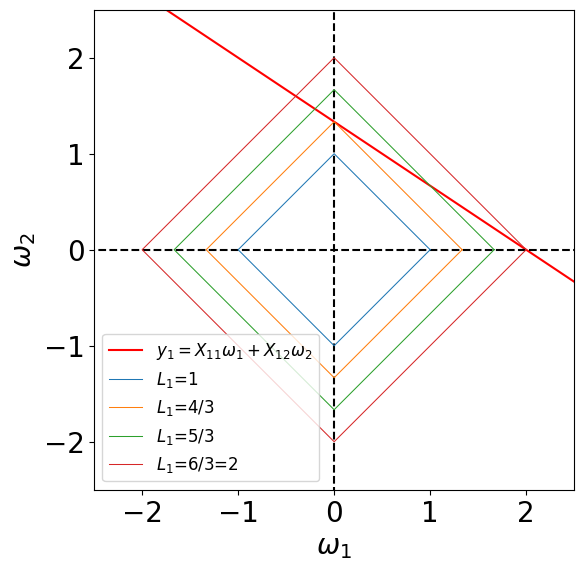

In [10]:
############################################
Lp_s = [(1.0, r'$L_{1}$=1'), (4/3, r'$L_{1}$=4/3'), (5/3, r'$L_{1}$=5/3'), (2.0, r'$L_{1}$=6/3=2')]
#
fig = Grf_omega12( p_th = 1.0, lp_vals = Lp_s )
#
fig.savefig( FilePath + FileBaseName + 'L1.pdf' )